# Table of Contents
 <p>

What's HMM?Refer to [youtube](https://www.youtube.com/playlist?list=PLKG3ExuC02lsnZUJDdOlYJd5CRe3otzq1)

**1.关于模型的选择：**  

hmmlearn 有三种模型，分别是Gaussian，Multinomial和GMMHMM。这三种模型对应的就是三种emission matrix（即混淆矩阵，也就是隐状态到观察态的概率）。Gaussian就是说混淆矩阵是一个高斯分布，即观察态是连续的。Multinomiual就是说混淆矩阵事一个Multibimiual distribution，即观察态势离散的。GMMHMM则是说混淆矩阵是遵循gaussinan mixture 分布，也是连续的.  

对于如何把混淆矩阵输入到模型中。首先要确定要分析的模型的混淆矩阵的类型。对于Gaussian类型，就是把mean和variance值放到模型里边。比如，下面example2 就是一个Gaussian类型。

**2.关于covariance_type的选择**  
1. spherical 是指在每个马尔科夫隐含状态下，可观察向量的所有特性分量使用相同的方差值。对应协方差阵的非对角为0，对角值相等，即球面特性。这是最简单的Gaussian分布。例如：
$$\mu=
\begin{pmatrix}
0\\
0
\end{pmatrix}$$

$$
\sum=
\begin{pmatrix}
1&0\\
0&1
\end{pmatrix}
$$

$$
\rho_{12}=0
$$


2. diag  是指每个马尔科夫隐含状态下，可观察向量使用对价协方差矩阵.对应协方差矩阵非对角为0，对角值不相等。diag是hmmlearn的默认类型。  

$$\mu=
\begin{pmatrix}
0\\
0
\end{pmatrix}$$

$$
\sum=
\begin{pmatrix}
1&0\\
0&4
\end{pmatrix}
$$

$$
\rho_{12}=0
$$


3. full  是指在每个马尔科夫状态下，可观察向量使用完全协方差矩阵。对应的协方差矩阵里面的元素都不为0.    
$$\mu=
\begin{pmatrix}
0\\
0
\end{pmatrix}$$

$$
\sum=
\begin{pmatrix}
1&-1\\
-1&4
\end{pmatrix}
$$

$$
\rho_{12}=-0.5
$$

4. tied  是指所有的马尔科夫隐含状态使用相同的完全协方差矩阵。


这四种PDF类型里面，spherical, diag和full代表三种不同的高斯分布概率密度函数，而tied则可以看作是GaussianHMM和GMMHMM的特有实现。其中，full是最强大的，但是需要足够多的数据来做合理的参数估计；spherical是最简单的，通常用在数据不足或者硬件平台性能有限的情况之下；而diag则是这两者一个折中。在使用的时候，需要根据可观察态向量不同特性的相关性来选择合适的类型。

cited from [zhihu](https://www.zhihu.com/question/33467075)

**example1**

In [1]:
from __future__ import division
import numpy as np
from hmmlearn import hmm

states=['Rainy','Sunny']
n_states=len(states)

observations=['walk','shop','clean']
n_observations=len(observations)

start_probability=np.array([0.6,0.4])

transition_probability=np.array([
    [0.7,0.3],
    [0.4,0.6]
])

emission_probability=np.array([
    [0.1,0.4,0.5],
    [0.6,0.3,0.1]
])

model=hmm.MultinomialHMM(n_components=n_states,init_params='')
model.startprob_=start_probability
model.transmat_=transition_probability
model.emissionprob_=emission_probability

#predict a sequence of hidden states based on visible states
bob_says=np.array([[0, 2, 1, 1, 2, 0]]).T

model=model.fit(bob_says)
logprob,alice_hears=model.decode(bob_says,algorithm='viterbi')
print 'Bob says:',','.join(map(lambda x: observations[x],bob_says))
print 'Alice hears:',','.join(map(lambda x:states[x],alice_hears))


Bob says: walk,clean,shop,shop,clean,walk
Alice hears: Sunny,Rainy,Rainy,Rainy,Rainy,Sunny


c:\python27\lib\site-packages\ipykernel_launcher.py:33: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future


**example2**  
from [documents of hmmlearn](http://hmmlearn.readthedocs.io/en/latest/auto_examples/plot_hmm_sampling.html#sphx-glr-auto-examples-plot-hmm-sampling-py)

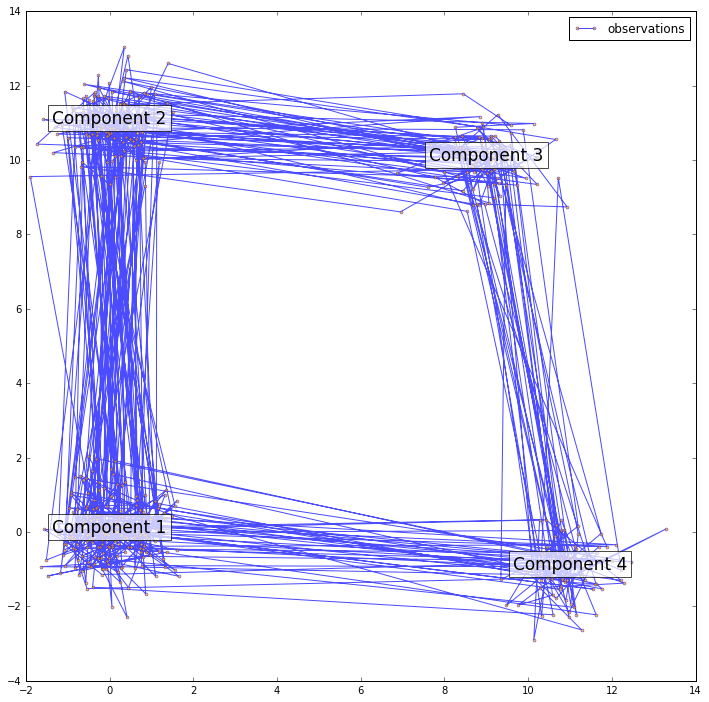

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm

startprob = np.array([0.6, 0.3, 0.1, 0.0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array([[0.0,  0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

# Build an HMM instance and set parameters
model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars

# Generate samples
X, Z = model.sample(500)

# Plot the sampled data
plt.figure(figsize=(12,12))
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()

In [8]:
covars

array([[[ 0.5,  0. ],
        [ 0. ,  0.5]],

       [[ 0.5,  0. ],
        [ 0. ,  0.5]],

       [[ 0.5,  0. ],
        [ 0. ,  0.5]],

       [[ 0.5,  0. ],
        [ 0. ,  0.5]]])

**example3**  
[HMM在股票市场中的应用](https://www.ricequant.com/research/user/user_298698/notebooks/HMM_final-2017-5-29%2016:22:46.ipynb)  
[hmm example](http://hmmlearn.readthedocs.io/en/latest/auto_examples/plot_hmm_stock_analysis.html#sphx-glr-auto-examples-plot-hmm-stock-analysis-py)  


假设隐藏状态是5，即假设股市的状态有5种，我们用3个指标去做预测。假设所有的特征向量服从高斯分布这样就可以使用hmmlearn中的GaussianHMM进行预测了。


In [102]:
%matplotlib inline

from __future__ import print_function
import datetime

import numpy as np
from matplotlib import cm,pyplot as plt
from matplotlib.dates import YearLocator,MonthLocator
try:
    from matplotlib.finance import quotes_historical_yahoo_ochl
except ImportError:
    # For Matplotlib prior to 1.5.
    from matplotlib.finance import (
        quotes_historical_yahoo as quotes_historical_yahoo_ochl
    )

from hmmlearn.hmm import GaussianHMM


In [103]:
from zht.data.data_handler import get_df
df=get_df('000001.SZ')

In [104]:
df=df.dropna()
spread=(df.high-df.low)/df.close
spread=spread[1:]
returns=df.close.pct_change()[1:]
volume=df.volume[1:]

In [105]:
A=np.column_stack([spread,volume,returns])

In [146]:
model=GaussianHMM(n_components=5,covariance_type='full',n_iter=2000).fit(A)
hidden_states=model.predict(A)

In [147]:
hidden_states

array([1, 1, 1, ..., 2, 2, 2])

In [148]:
(hidden_states==1)

array([ True,  True,  True, ..., False, False, False], dtype=bool)

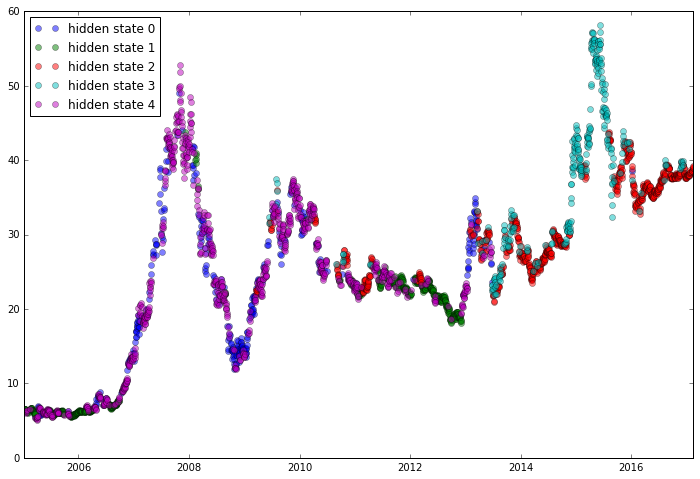

In [155]:
import pandas as pd
Date=pd.to_datetime(returns.index)
close=df.close[1:]

plt.figure(figsize=(12,8))
for i in range(model.n_components):
    pos=(hidden_states==i)
    plt.plot_date(Date[pos],close[pos],'o',label='hidden state %d'%i,lw=1,alpha=0.5)
    plt.legend(loc='upper left')

Transition matrix
[[  6.59755480e-01   7.90928891e-04   3.35684289e-02   9.88945831e-03
    2.95995704e-01]
 [  9.02960697e-03   8.82285273e-01   2.49558884e-03   6.06348922e-41
    1.06189532e-01]
 [  1.74915359e-02   4.55345457e-09   9.20848123e-01   5.62775763e-02
    5.38276055e-03]
 [  2.43205521e-15   6.70635253e-65   1.61528365e-01   8.38471635e-01
    5.91380145e-39]
 [  1.42199672e-01   9.78779914e-02   1.70775300e-03   2.38721814e-05
    7.58190711e-01]]

Means and vars of each hidden state
0th hidden state
mean =  [  6.48220084e-02   5.06894790e+07   6.47413101e-03]
var =  [  5.77959727e-04   6.74005378e+14   2.74861013e-03]

1th hidden state
mean =  [  2.09469079e-02   1.19066300e+07  -7.41781821e-04]
var =  [  7.10197255e-05   3.68551866e+13   1.60477690e-04]

2th hidden state
mean =  [  1.99301108e-02   5.04160113e+07  -1.35922543e-03]
var =  [  1.23383024e-04   3.44161887e+14   1.61194122e-04]

3th hidden state
mean =  [  4.87567607e-02   1.81711192e+08   6.86857074e-03]

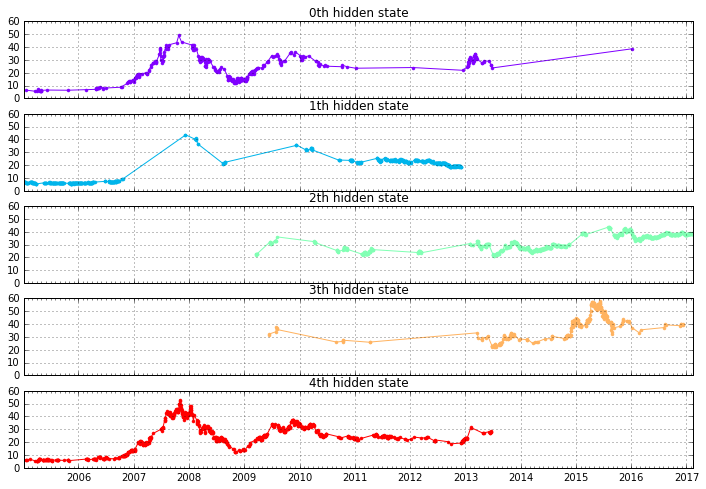

In [171]:
print("Transition matrix")
print(model.transmat_)
print()

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covars_[i]))
    print()

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True,figsize=(12,8))
colours = cm.rainbow(np.linspace(0, 1, model.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(Date[mask], close[mask], ".-", c=colour)
    ax.set_title("{0}th hidden state".format(i))

    # Format the ticks.
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())

    ax.grid(True)


为了更直观的表现不同的隐藏状态分别对应了什么，我们采取获得隐藏状态结果后第二天进行买入的操作，这样可以看出每种隐藏状态代表了什么。

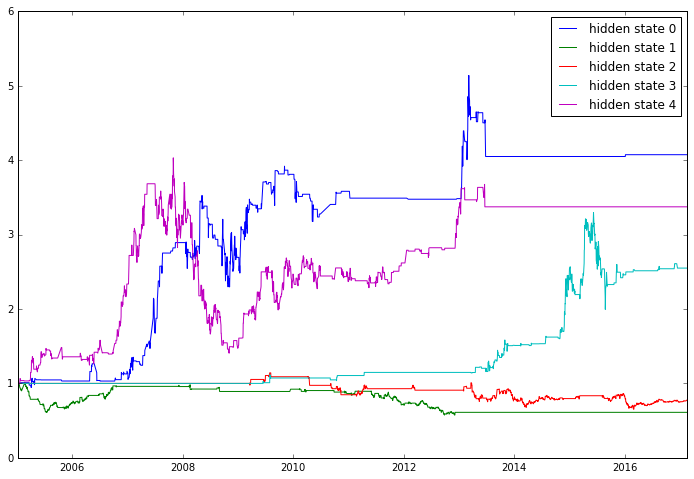

In [150]:
res = pd.DataFrame({'Date':Date,'returns':returns,'state':hidden_states}).set_index('Date')
plt.figure(figsize=(12,8)) 
for i in range(model.n_components):
    pos = (hidden_states==i)
    pos = np.append(0,pos[:-1])#第二天进行买入操作
    s = res.returns
    res['state_ret%s'%i] = s.multiply(pos)
    plt.plot_date(Date,np.exp(res['state_ret%s'%i].cumsum()),'-',label='hidden state %d'%i)
    plt.legend(loc="left")

我们不妨买入状态0和状态3，卖出状态1和状态2，其余则不持有

In [152]:
long=(hidden_states==0)+(hidden_states==3)
short=(hidden_states==1)+(hidden_states==2)
long=np.append(0,long[:-1])
short=np.append(0,short[:-1])

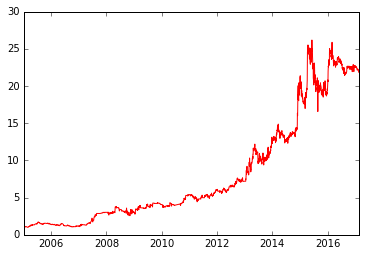

In [172]:
res['ret'] =  s.multiply(long) - s.multiply(short)  
plt.plot_date(Date,np.exp(res['ret'].cumsum()),'r-')

可以看到效果还是很不错的。但事实上该结果是有些问题的。真实操作时，我们并没有未来的信息来训练模型。不过可以考虑用历史数据进行训练，再对之后的数据进行预测。